##  GitHub URL: https://github.com/gsahai1x/AIML

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Objective:
>* Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

#### Context: 
>* Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
#### Data Description: 
>* The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
#### Data Dictionary:
>* RowNumber: Row number.
>* CustomerId: Unique identification key for different customers.
>* Surname: Surname of the customer
>* Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
>* Geography: The country to which the customer belongs.
>* Gender: The gender of the customer.
>* Age: Age of the customer.
>* Tenure: The period of time a customer has been associated with the bank.
>* Balance: The account balance (the amount of money deposited in the bank account) of the customer.
>* NumOfProducts: How many accounts, bank account affiliated products the person has.
>* HasCrCard: Does the customer have a credit card through the bank?
>* IsActiveMember: Subjective, but for the concept
>* EstimatedSalary: Estimated salary of the customer.
>* Exited: Did they leave the bank after all?
#### Points Distribution:
>* The points distribution for this case is as follows:

>> 1. Read the dataset
>>2. Drop the columns which are unique for all users like IDs (5 points)
>>3. Perform bivariate analysis and give your insights from the same (5 points) 
>> 4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
>> 5. Normalize the train and test data (10points)
>> 6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
>>7. Predict the results using 0.5 as a threshold (10points)
>>8. Print the Accuracy score and confusion matrix (5 points)

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport, ROCAUC
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))
from sklearn import set_config
set_config(print_changed_only=False)
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,StratifiedKFold
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense,Conv1D,Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers

2.4.1


In [3]:
#import Data
df = pd.read_csv('bank.csv')

In [4]:
#Read first few records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


### Univariate Analysis

In [5]:
#Get information related to data types, column names, null counts and range
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

>* there are 9 columns and 1030 rows. 8 features and 1 label

In [7]:
#Get details related to counts, mean, std, min, max, and quartiles
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00","5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"10,000.00",5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"


* Unique 10000 records
* Row Number, Customer seems to be just sequential numbers and can be dropped

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No nulls

In [9]:
df[df.duplicated() == True].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No Duplicates

### Drop the columns which are unique for all users like IDs

In [10]:
df['Surname'].value_counts()

Smith          32
Scott          29
Martin         29
Walker         28
Brown          26
               ..
Summerville     1
Jessop          1
Levi            1
Donoghue        1
Hess            1
Name: Surname, Length: 2932, dtype: int64

>* Surname is the last name of a person and in itself should not help in predicting the model. It can add to false positives, if the model sees a correlation between surname category codes, if converted, and the churned customers. Dropping it from the feature list

In [11]:
#Drop Row ID and Customer ID, Surname
df1 = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [12]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


* Dropped Row, Customer ID, and Surname

In [13]:
for col in df1.columns:
    print(col, df1[col].value_counts().unique())

CreditScore [233  63  54  53  52  50  48  47  46  45  44  43  42  41  40  39  38  37
  36  35  34  33  32  31  30  29  28  27  26  25  24  23  22  21  20  19
  18  17  16  15  14  13  12  11  10   9   8   7   6   5   4   3   2   1]
Geography [5014 2509 2477]
Gender [5457 4543]
Age [478 477 474 456 447 442 432 423 418 404 366 348 327 321 297 273 257 229
 226 209 200 175 168 154 147 134 132 119 102  99  84  82  75  74  70  67
  62  53  52  40  37  35  27  22  21  19  18  13  11  10   9   5   4   3
   2   1]
Tenure [1048 1035 1028 1025 1012 1009  989  984  967  490  413]
Balance [3617    2    1]
NumOfProducts [5084 4590  266   60]
HasCrCard [7055 2945]
IsActiveMember [5151 4849]
EstimatedSalary [2 1]
Exited [7963 2037]


>* Dataset seems to have imbalanced output class

In [14]:
df1.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

* Geography convert category into codes

In [15]:
#codes
df1['geocode'] = df1.Geography.astype('category').cat.codes

In [16]:
df1.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

* Gender convert to codes

In [17]:
#codes
df1['gencode'] = df1.Gender.astype('category').cat.codes

In [18]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geocode,gencode
0,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1,0,0
1,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0,2,0
2,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1,0,0
3,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0,0,0
4,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0,2,0


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  geocode          10000 non-null  int8   
 12  gencode          10000 non-null  int8   
dtypes: float64(2), int64(7), int8(2), object(2)
memory usage: 879.0+ KB


>* 10K rows. Geography and Ange are object. Balance and Salary are floats

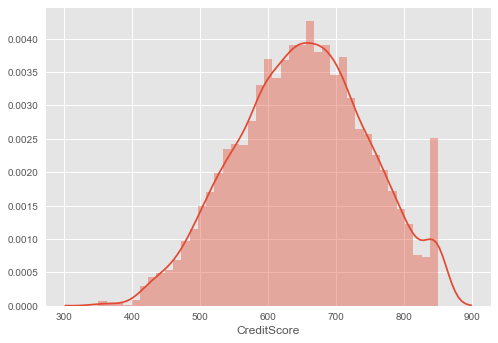

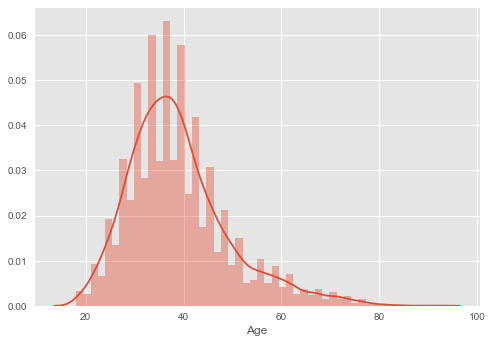

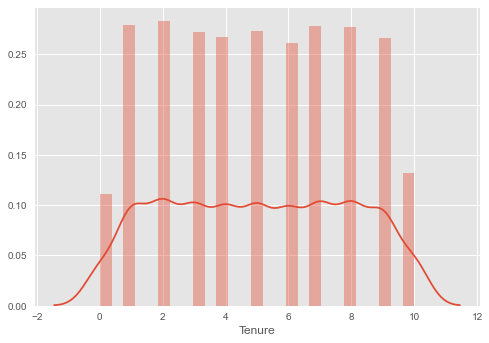

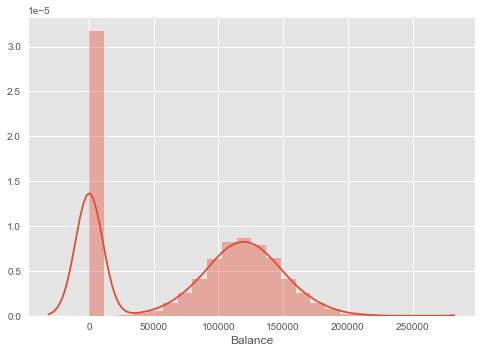

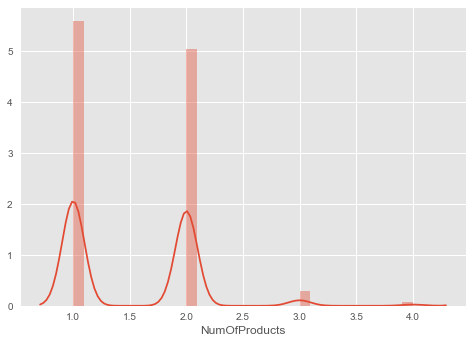

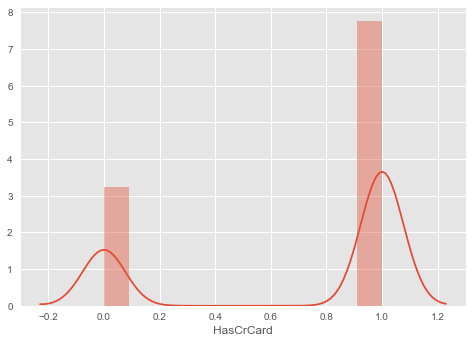

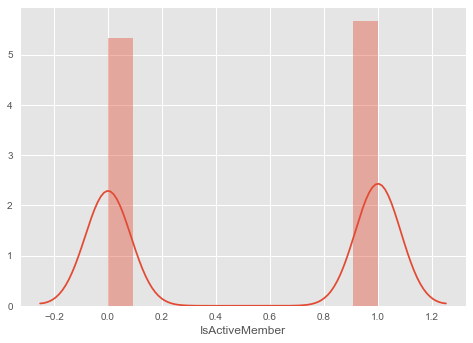

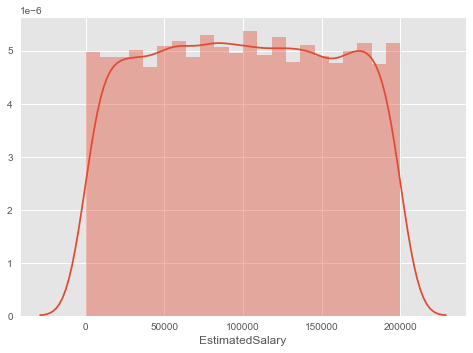

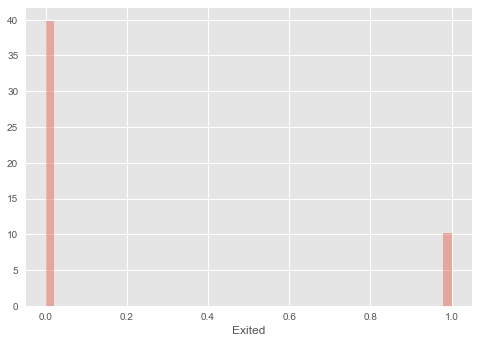

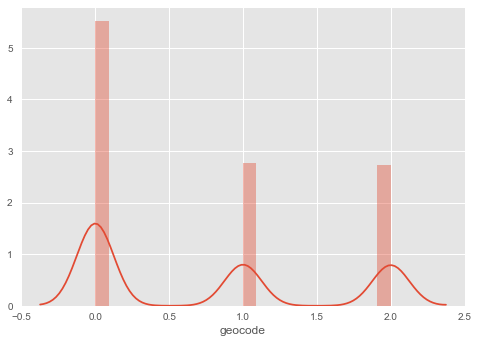

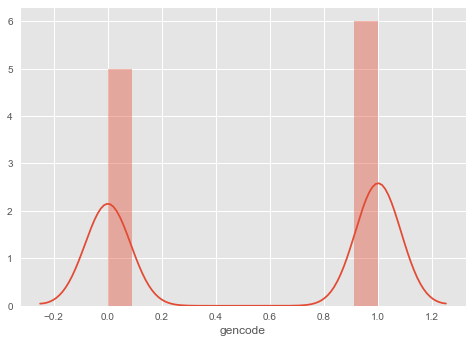

In [20]:
for col in df1.columns:
    if (df1[col].dtypes != object):
        ax = sns.distplot(df1[col])
        plt.show()

#### Notes
* Tenure - No observations
* NumOfProducts - Most have 1 or 2 products. A few have 3-4 products
* HasCrCard - Most customers have 1 credit card with bank. 
* IsActiveMember - Almost half are active members and in assumption other half are inactive members. 
* Exited - 1 indicates the customers who have already signed up with another bank for a similar service, this bank offers. Most have not exited, a small percentage have exited. We are trying to predict if a customer has exited.
* geocode - 0 = France, 1 = Germany, 2 = Spain. Most customer data is from France
* gencode - 0 = Female, 1 = Male. A higher percentage are males. 

#### Actions
* Credit Score - Looks to be normal distribution. Check the spike around 850
* Age - Skewed to right. Check for Ouliers
* Balance - A big chunk has 0 balance. Check if that needs to be handled.
* EstimatedSalary - Check if there are any 0 salaries

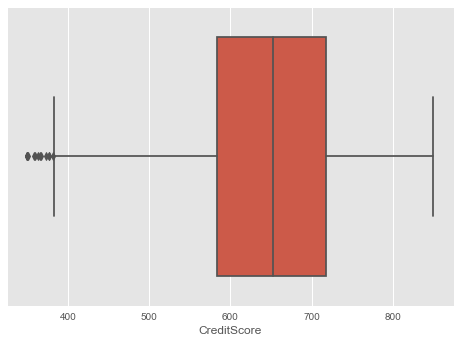

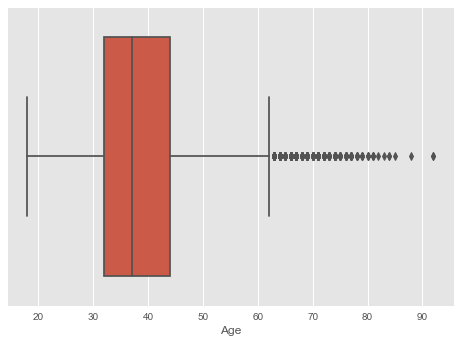

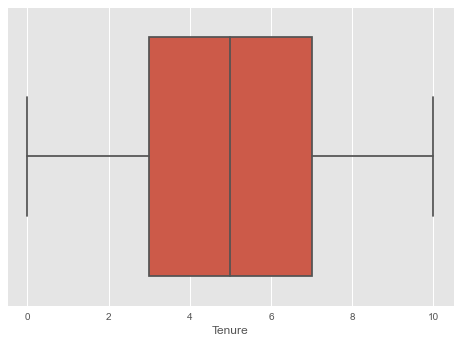

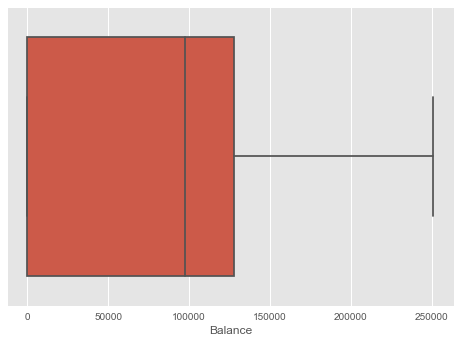

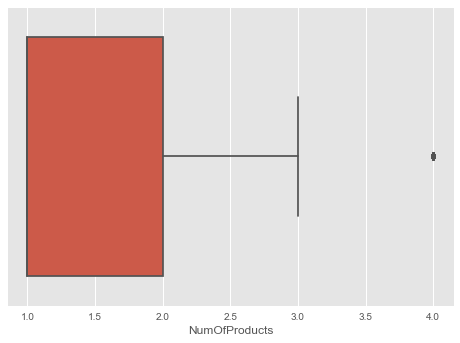

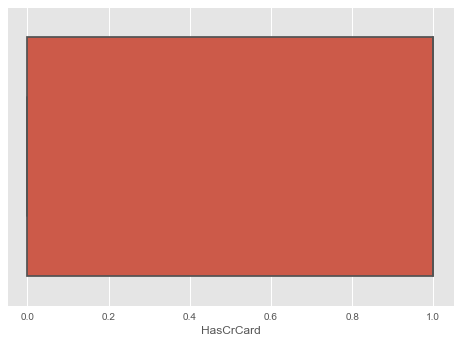

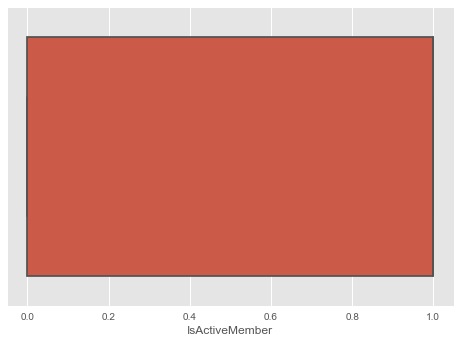

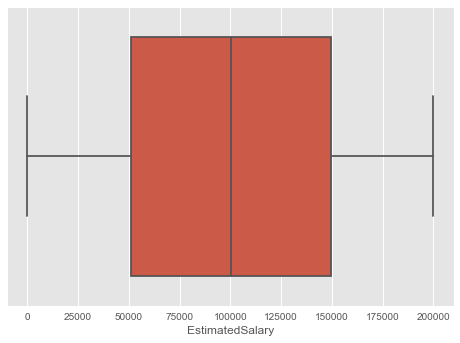

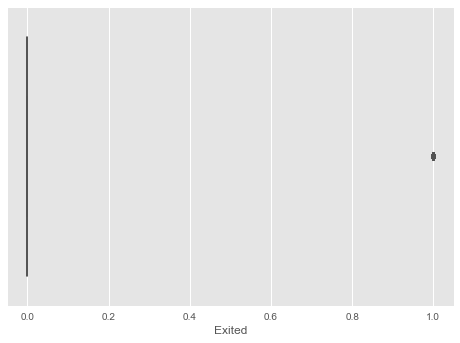

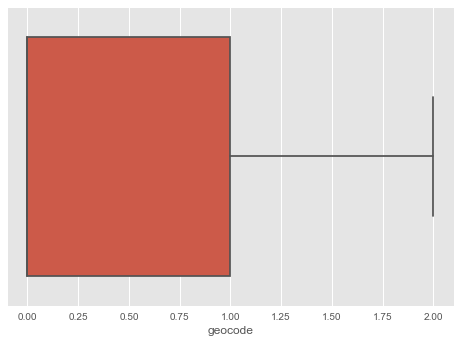

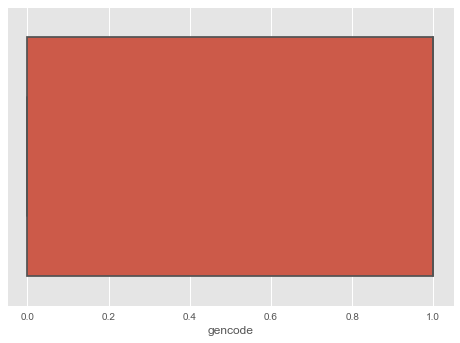

In [21]:
#get outliers
for col in df1.columns:
    if (df1[col].dtypes != object):
        ax = sns.boxplot(df1[col])
        plt.show()

* Credit Score < 400. Check on Outliers. 
* Age - Check on Outliers. 
* Balance - A big chunk has 0 balance. Check if that needs to be handled.
* NumOfProducts - Check how many have 4 products. 

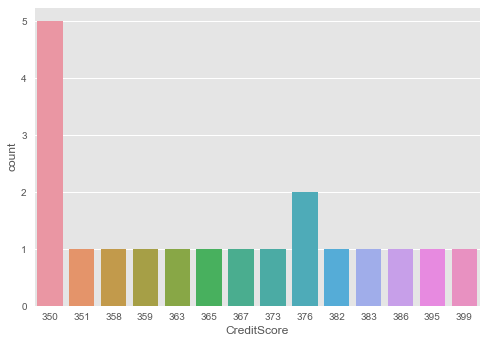

In [22]:
sns.countplot(df1[df1.CreditScore < 400]['CreditScore'])

* Customers with credit score < 400 look to be legitimate numbers.

In [23]:
# df1['CreditScore'] = df1.CreditScore.mask(df1.CreditScore < 400, df1.CreditScore.median())

In [24]:
# sns.boxplot(df1['CreditScore'])

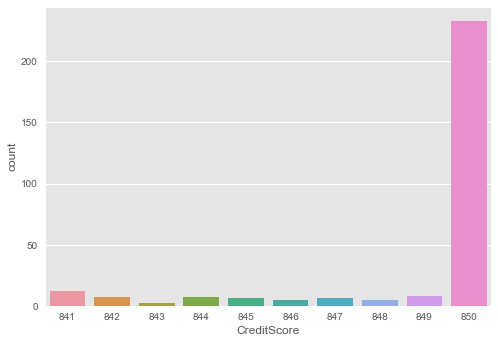

In [25]:
sns.countplot(df1[df1.CreditScore > 840]['CreditScore'])

* A spike in customers with a score of 850. Cannot form any conclusion. 

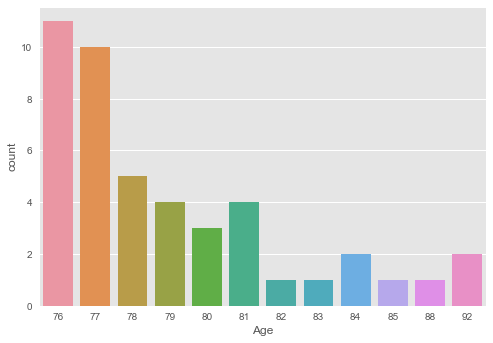

In [26]:
sns.countplot(df1[df1.Age > 75]['Age'])

* No abnormalities. Keep age as is. 

In [27]:
df1[df1.EstimatedSalary == 0]['EstimatedSalary'].count()

0

* No 0 salaries

In [28]:
df1[df1.Balance == 0]['Balance'].count()

3617

* High number of customers with 0 balance. Lets see in bivariate analysis if there is a relation between 0 balance and customers exiting. 

### Bivariate Analysis

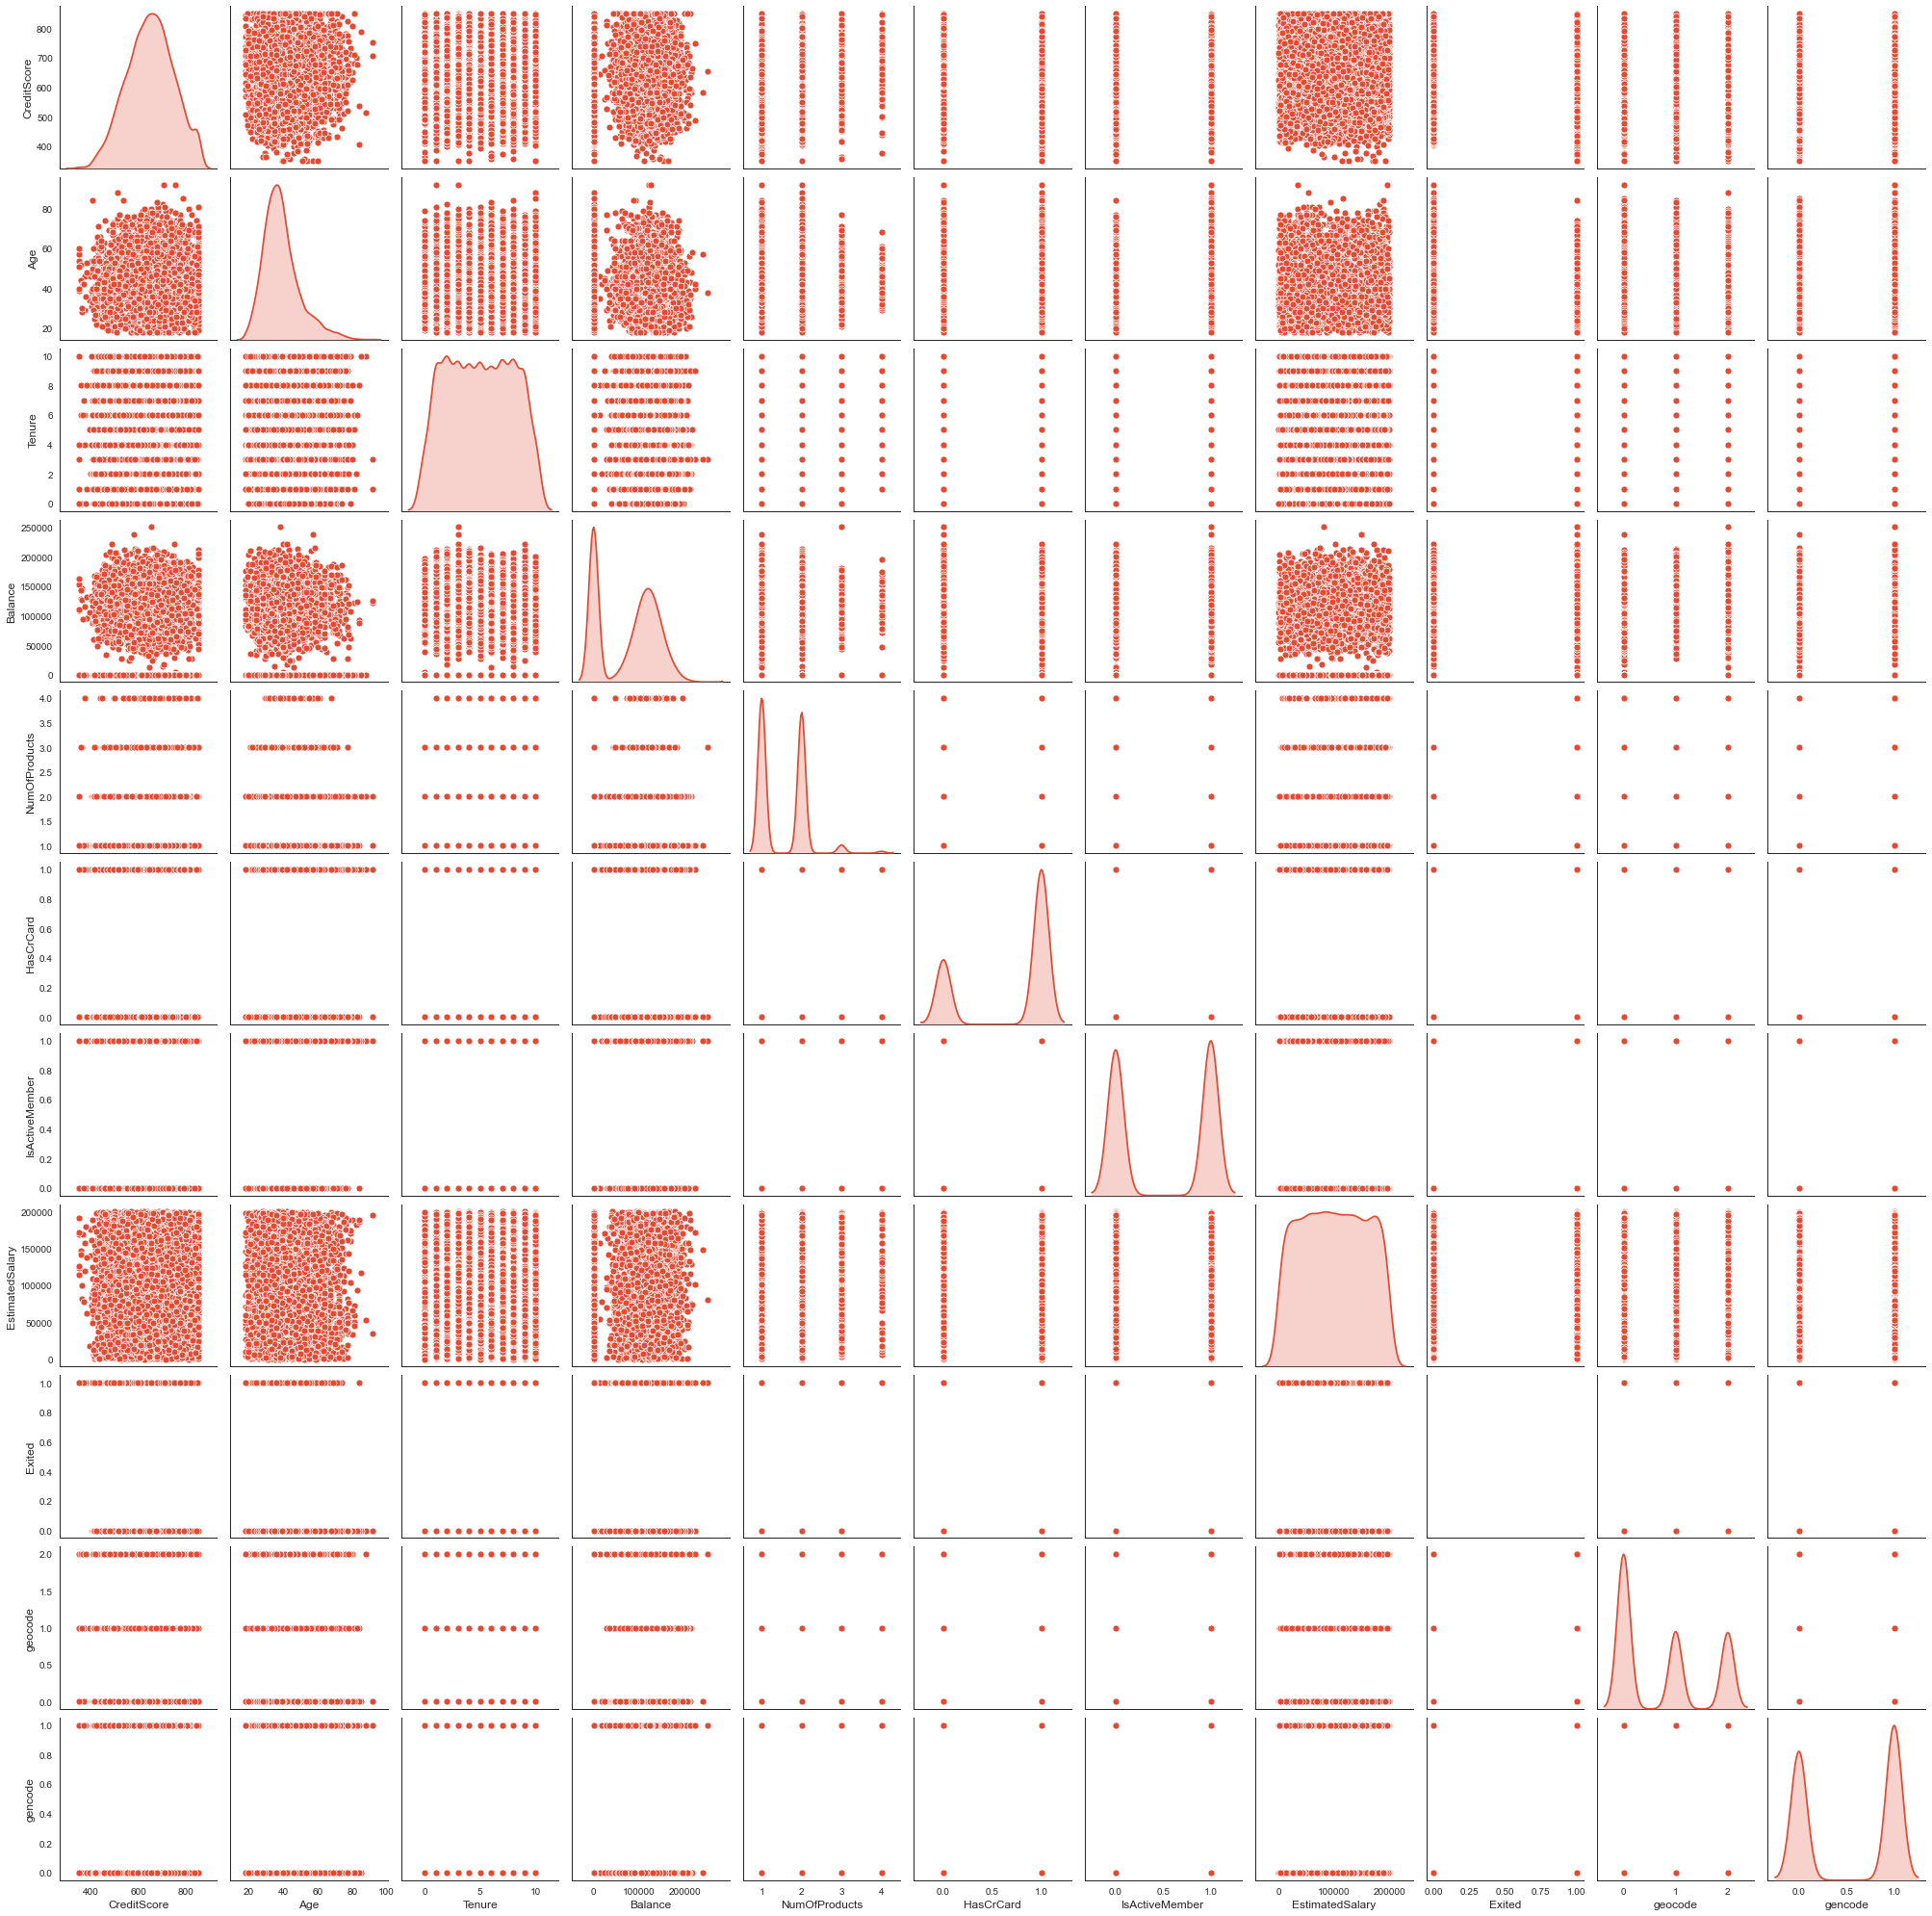

In [68]:
sns.set_style('ticks')
sns.pairplot(df1, diag_kind='kde')

#### Notes
* Customers with lower credit score, very high balance, 4 products are more likely to churn
* Customers with very high ages are less likely to churn

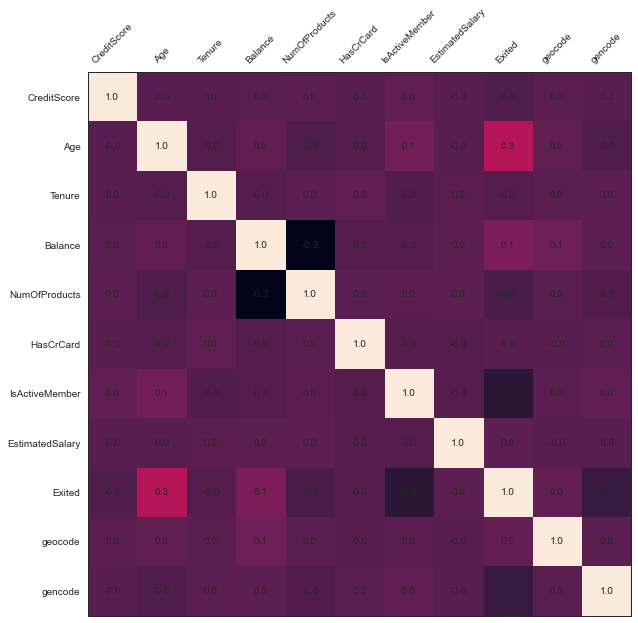

In [30]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(df1)

* No evident correlation other than a small correlation between Exited and Age as we have seen in pairplot

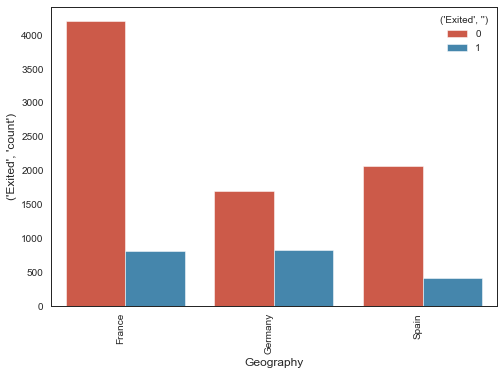

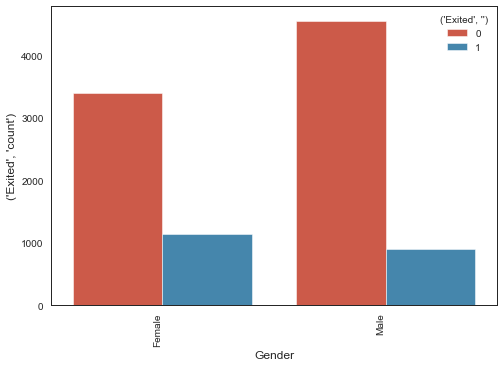

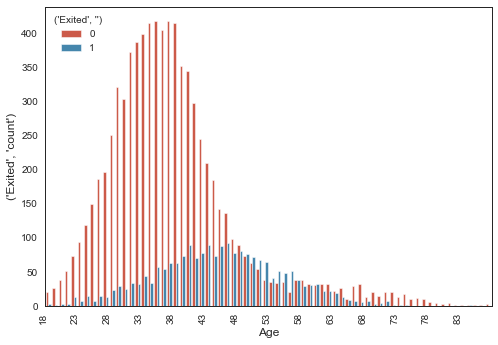

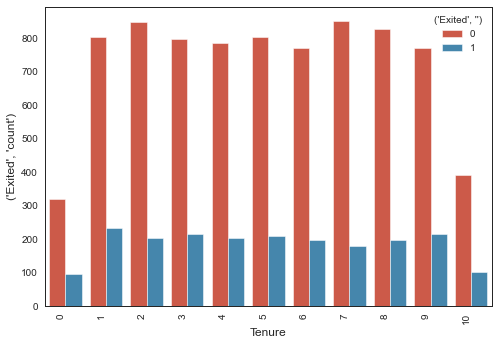

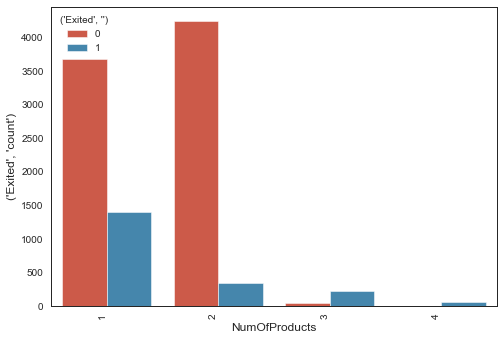

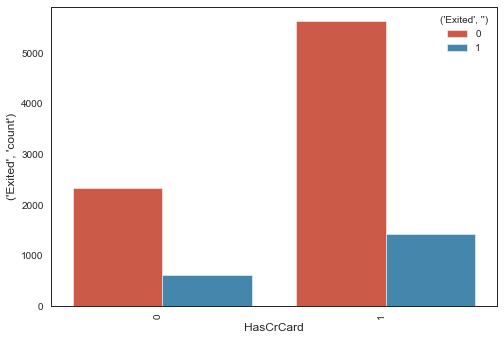

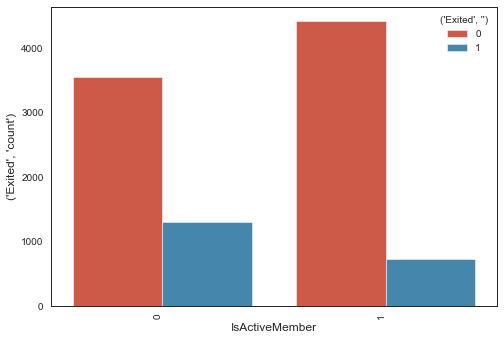

In [31]:
#get a relation plot with strength
for col in ['Geography', 'Gender', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    df2 = df1.groupby([col,'Exited']).agg({'Exited': ['count']}).reset_index()
    ax = sns.barplot(x=col,y=('Exited','count'),hue=('Exited',''), data=df2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    b = len(ax.get_xticklabels())
    for ind, label in enumerate(ax.get_xticklabels()):
        if b > 50:
            if ind % 5 == 0:  # every 10th label is kept
                label.set_visible(True)
            else:
                label.set_visible(False)
#         elif b > 100:
#             if ind % 100 == 0:  # every 5th label is kept
#                 label.set_visible(True)
#             else:
#                 label.set_visible(False)
#         elif b >=30 and b <= 100:
#             if ind % 5 == 0:  # every 5th label is kept
#                 label.set_visible(True)
#             else:
#                 label.set_visible(False)
    plt.show()

* France and Spain customers are less likely to churn, Germany customers are more likely to Churn
* females are more likely to churn than males
* As has seen before a lower age(18-20) or a very high age 75+ has a lower chance of churn.
* Customers with 3 or 4 products are more likely to Churn
* Non Active-Members are more likely to churn

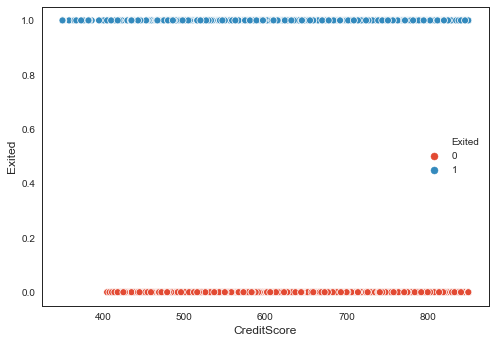

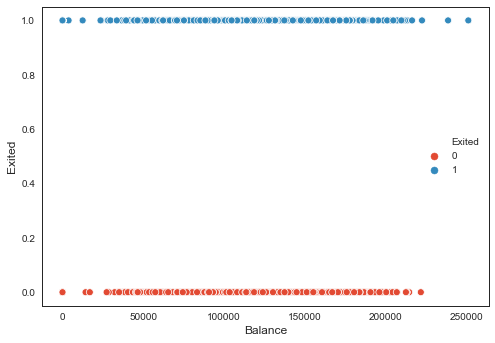

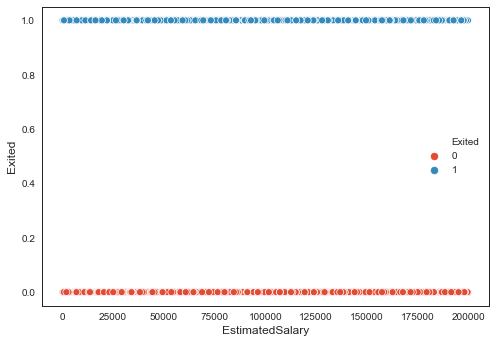

In [32]:
#get scatter plot for columns with continuous values.
for col in ['CreditScore','Balance','EstimatedSalary']:
#     df2 = pd.DataFrame(df1.groupby(['Exited'])[col].value_counts(normalize=True)*100)
#     df2 = df2.rename(columns = {col:'Value'}).reset_index()
    ax = sns.scatterplot(x=col,y='Exited', hue='Exited', data=df1)
    plt.show()

* Customers with lower credit score are more likely to churn
* Customers with very high balance are more likely to chrun

In [33]:
#dropping object types and passing category codes
df3 = df1.drop(['Geography','Gender'],axis=1)

In [34]:
df3.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'geocode', 'gencode'],
      dtype='object')

### Distinguish the feature and target set and divide the data set into training and test sets (5 points)

#### Hyperparameter Tuning: Summary
>* Added 1 - 300 neurons in the 1st Dense Layer. **7 neurons in the 1st layer seems to be producing best results.**
>* Added 1 - 300 neurons in the 2nd Dense Layer. **No 2nd Dense layer seem to be producing best results**
>* Tried with Activation Functions relu, tanh, sigmoid in all layers. **relu and sigmoid are working better.**
>* Tried with Optimizers Adam, Adamax, SGD, RMSprop, Nadam. **Adam seems to be performing better**
>* Tried with metrics AUC, Accuracy, FalseNegatives. **AUC is a better indicator**
>* Tried with epochs 5-600. **epochs between 15-20 seems to be performing better**

In [35]:
X= df3[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'geocode', 'gencode']]
y= df3[['Exited']].values

In [36]:
X.shape, y.shape

((10000, 10), (10000, 1))

In [37]:
#Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Normalize the train and test data

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
x_train.shape

(8000, 10)

In [40]:
values, counts = np.unique(y_test, return_counts=True)
values, counts

(array([0, 1], dtype=int64), array([1607,  393], dtype=int64))

In [41]:
#Tensorflow model
model=Sequential()
model.add(Dense(7, input_shape = (10,), activation = 'relu'))
# model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
sgd = optimizers.Adam(lr = 0.01)
model.compile(optimizer=sgd,metrics=['AUC'],loss='BinaryCrossentropy')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 77        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x_train,y_train,batch_size=500,validation_split=0.2,epochs=25, verbose=1)
hist = pd.DataFrame(history.history)

Epoch 1/25
13/13 [==============================] - 5s 262ms/step - loss: 0.5401 - auc: 0.6397 - val_loss: 0.4703 - val_auc: 0.6908
Epoch 2/25
13/13 [==============================] - 0s 11ms/step - loss: 0.4645 - auc: 0.7077 - val_loss: 0.4471 - val_auc: 0.7290
Epoch 3/25
13/13 [==============================] - 0s 9ms/step - loss: 0.4479 - auc: 0.7409 - val_loss: 0.4330 - val_auc: 0.7522
Epoch 4/25
13/13 [==============================] - 0s 9ms/step - loss: 0.4331 - auc: 0.7591 - val_loss: 0.4225 - val_auc: 0.7680
Epoch 5/25
13/13 [==============================] - 0s 9ms/step - loss: 0.4227 - auc: 0.7745 - val_loss: 0.4129 - val_auc: 0.7804
Epoch 6/25
13/13 [==============================] - 0s 10ms/step - loss: 0.4114 - auc: 0.7794 - val_loss: 0.4042 - val_auc: 0.7914
Epoch 7/25
13/13 [==============================] - 0s 10ms/step - loss: 0.4024 - auc: 0.7901 - val_loss: 0.3960 - val_auc: 0.8018
Epoch 8/25
13/13 [==============================] - 0s 9ms/step - loss: 0.3939 - auc:

In [44]:
hist['epoch'] = history.epoch
hist.head()

,loss,auc,val_loss,val_auc,epoch
0,0.51,0.65,0.47,0.69,0
1,0.46,0.72,0.45,0.73,1
2,0.44,0.75,0.43,0.75,2
3,0.43,0.76,0.42,0.77,3
4,0.42,0.77,0.41,0.78,4


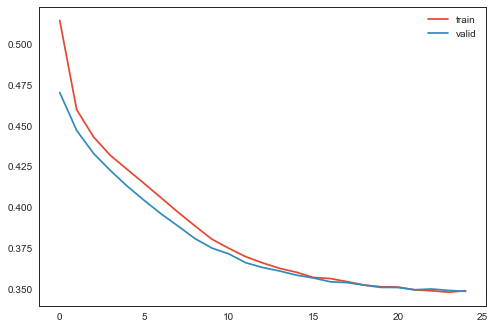

In [45]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train","valid"), loc=0)

>* If we try to make a very smooth curve, the loss increases. The problem statement is about predicting likely to churn customers correctly thus requirement is to minimize loss
>* Multiple runs are resulting in variations in graph.Sometimes the results are coming out as loss values are coinciding, but sometimes they are moving apart. The idea is to make sure the model is not overfit.

In [46]:
#Evaluate the model on Test Data
results = model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3509 - auc: 0.8455


In [47]:
#Print Metrics
print(model.metrics_names)
print(results) 

['loss', 'auc']
[0.35085242986679077, 0.8454954624176025]


### Predict the results using 0.5 as a threshold

In [48]:
#Predicting Classes will not have the threshold we want to set. 
Y_preds = model.predict(x_test, batch_size=500, verbose=1)
Y_pred_cls = preds=np.where(Y_preds>=0.5,1,0)

4/4 [==============================] - 0s 2ms/step


### Print the Accuracy score and confusion matrix

In [49]:
print('Accuracy Model (Dropout): '+ str(model.evaluate(x_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F1-score: ' + str(f1_score(y_test,Y_pred_cls)))
print('Accuracy score: ' + str(accuracy_score(y_test, Y_pred_cls)))

63/63 [==============================] - 0s 1ms/step - loss: 0.3509 - auc: 0.8455
Accuracy Model (Dropout): 0.8454954624176025
Recall_score: 0.4020356234096692
Precision_score: 0.7559808612440191
F1-score: 0.5249169435215947
Accuracy score: 0.857


>* Model Accuracy > 85%, but Recall and F1-scores are very low. The reason is imbalanced dataset. Run with SMOTE 

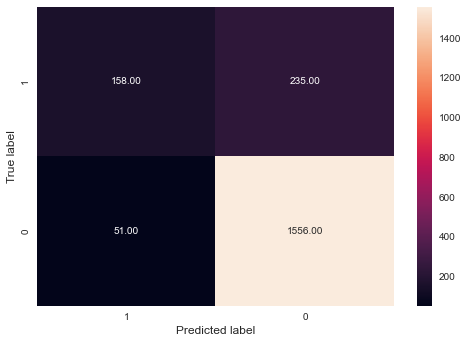

In [50]:
#confusion matrix function definition
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm(y_test, Y_pred_cls)

### Analysis:
#### It can be inferred from above, that above model has a good accuracy of >85%, but it is also true that the dataset is highly imbalanced. Out of 10K records, ~8K are negative and ~2K are positive classes. That is the reason Recall, F1score are very low. 
#### Make the dataset balanced using SMOTE and run the model again

### Run Model on Balanced dataset - SMOTE

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X, y = sm.fit_resample(X, y)

In [52]:
X.shape, y.shape

((15926, 10), (15926,))

In [53]:
from collections import Counter
Counter(y, count=True)

Counter({1: 7963, 0: 7963, 'count': 1})

>* **Dataset is now balanced both positive and negative classes have equal counts**

In [54]:
#Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Normalize the train and test data (balanced dataset)

In [55]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [56]:
x_train.shape

(12740, 10)

In [57]:
values, counts = np.unique(y_test, return_counts=True)
values, counts

(array([0, 1], dtype=int64), array([1633, 1553], dtype=int64))

In [58]:
#Tensorflow model
model_b=Sequential()
model_b.add(Dense(7, input_shape = (10,), activation = 'relu'))
# model_b.add(Dense(10, activation = 'tanh'))
model_b.add(Dense(1, activation = 'sigmoid'))
sgd_b = optimizers.Adam(lr = 0.01)
model_b.compile(optimizer=sgd_b,metrics=['AUC'],loss='BinaryCrossentropy')

In [59]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [60]:
history_b = model_b.fit(x_train,y_train,batch_size=500,validation_split=0.2,epochs=25, verbose=1)
hist_b = pd.DataFrame(history_b.history)

Epoch 1/25
21/21 [==============================] - 2s 34ms/step - loss: 0.6951 - auc: 0.5813 - val_loss: 0.5439 - val_auc: 0.8095
Epoch 2/25
21/21 [==============================] - 0s 6ms/step - loss: 0.5250 - auc: 0.8218 - val_loss: 0.4785 - val_auc: 0.8525
Epoch 3/25
21/21 [==============================] - 0s 6ms/step - loss: 0.4738 - auc: 0.8557 - val_loss: 0.4637 - val_auc: 0.8621
Epoch 4/25
21/21 [==============================] - 0s 7ms/step - loss: 0.4527 - auc: 0.8693 - val_loss: 0.4509 - val_auc: 0.8703
Epoch 5/25
21/21 [==============================] - 0s 6ms/step - loss: 0.4444 - auc: 0.8751 - val_loss: 0.4421 - val_auc: 0.8762
Epoch 6/25
21/21 [==============================] - 0s 7ms/step - loss: 0.4251 - auc: 0.8867 - val_loss: 0.4325 - val_auc: 0.8815
Epoch 7/25
21/21 [==============================] - 0s 7ms/step - loss: 0.4254 - auc: 0.8863 - val_loss: 0.4270 - val_auc: 0.8846
Epoch 8/25
21/21 [==============================] - 0s 7ms/step - loss: 0.4231 - auc: 0.8

In [61]:
hist_b['epoch'] = history_b.epoch
hist_b.head()

,loss,auc,val_loss,val_auc,epoch
0,0.64,0.67,0.54,0.81,0
1,0.51,0.84,0.48,0.85,1
2,0.47,0.86,0.46,0.86,2
3,0.45,0.87,0.45,0.87,3
4,0.44,0.88,0.44,0.88,4


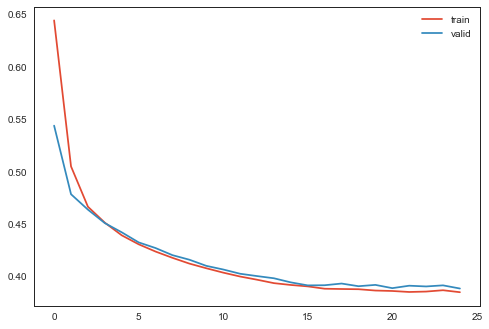

In [62]:
plt.plot(hist_b['loss'])
plt.plot(hist_b['val_loss'])
plt.legend(("train","valid"), loc=0)

* if we try to make a very smooth curve, the loss increases. The problem statement is about predicting likely to churn customers correctly thus requirement is to minimize loss

In [63]:
#Evaluate the model on Test Data
results_b = model_b.evaluate(x_test, y_test)

100/100 [==============================] - 0s 1ms/step - loss: 0.3742 - auc: 0.9137


In [64]:
#Print Metrics
print(model_b.metrics_names)
print(results_b) 

['loss', 'auc']
[0.3742416501045227, 0.9136725664138794]


### Predict the results using 0.5 as a threshold on balanced dataset

In [65]:
#Predicting Classes will not have the threshold we want to set. 
Y_preds_b = model_b.predict(x_test, batch_size=500, verbose=1)
Y_pred_cls_b = np.where(Y_preds_b>=0.5,1,0)

7/7 [==============================] - 0s 1ms/step


### Print the Accuracy score and confusion matrix on balanced dataset

In [66]:
print('Accuracy Model (Dropout): '+ str(model_b.evaluate(x_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls_b)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls_b)))
print('F1-score: ' + str(f1_score(y_test,Y_pred_cls_b)))
print('Accuracy score: ' + str(accuracy_score(y_test, Y_pred_cls_b)))

100/100 [==============================] - 0s 1ms/step - loss: 0.3742 - auc: 0.9137
Accuracy Model (Dropout): 0.9136725664138794
Recall_score: 0.8448164842240824
Precision_score: 0.82
F1-score: 0.8322232794164288
Accuracy score: 0.8339610797237916


>* Model Accuracy went down, still good > 83%, but Recall and F1-scores increased many folds on balanced dataset.Recall >80% and F1>80%

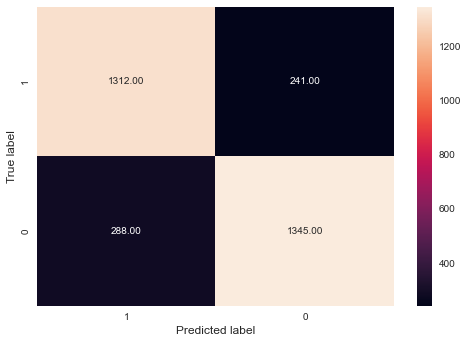

In [67]:
#confusion matrix function definition
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm(y_test, Y_pred_cls_b)

### Analysis on balanced dataset:
#### The accuracy went down, but still good and greater than 80%. F1score and Recall went up many folds and are greater than 80%

### Business Outcome:
>* In this case objective is to predict customer churn rate that means it is important to predict more accurately if the customer is likely to exit. In other words F1score needs to be higher. 
>* **Why not just Precision or Recall higher**
>>* Precision will tell us how many customers in actual not exited, but were predicted as exited.
>>* Recall Recall will tell us how many customers in actual exited, but were predicted as not exited.
>>* **One tells if the customer leaves and another tells if the customer will not leave, both are important. so F1score.**
>>* F1score is a measure of balance between precision and recall. 
#### Reiterating the Objective: 
>* Given a Bank customer, build a neural network-based classifier that can determine whether they **will leave or not** in the next 6 months.
>* In the first model, accuracy was good >85%, but F1score was a lot lower. 
>* **In the balanced dataset, F1score is >80% is a good indicator that model is likely to perform well in Production environment**